In [1]:
#importing modules
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split

# Figuers inline and set visualization style

%matplotlib inline
sns.set()

In [2]:
os.listdir('Python Project')

['.ipynb_checkpoints', 'gender_submission.csv', 'test.csv', 'train.csv']

# Dataframes reading


In [3]:
df_train=pd.read_csv('python project/train.csv')

df_test=pd.read_csv('python project/test.csv')

# Dataframes shape overview

In [4]:
# train dataset 

print(df_train.shape)
df_train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# test dataset

print(df_test.shape)
df_test.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Basic EDA


sns.countplot(x='Survived', data=df_train)

<Axes: xlabel='Sex', ylabel='count'>

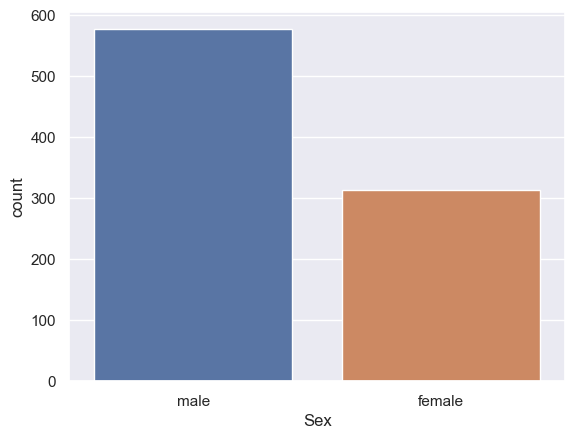

In [6]:
sns.countplot(x='Sex', data=df_train)

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


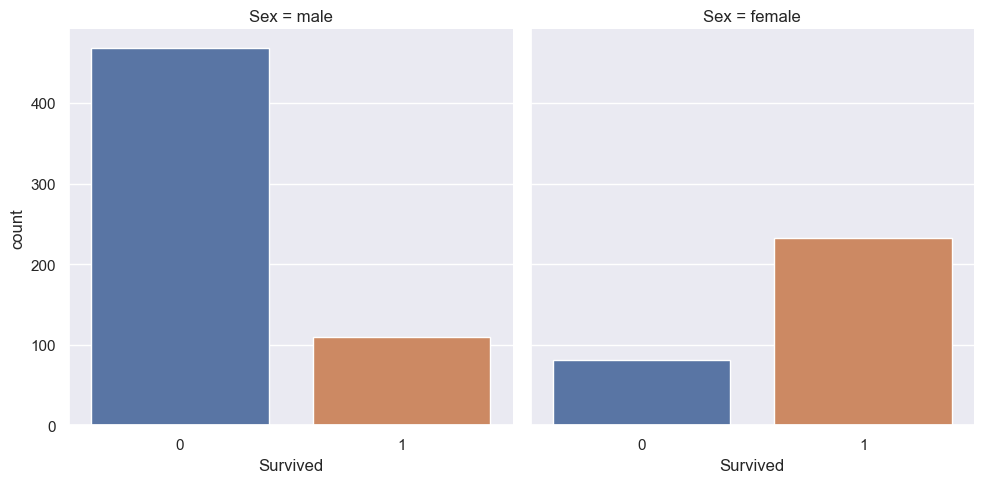

In [7]:
sns.catplot(x='Survived', col='Sex', kind='count', data=df_train);

From EDA plots on data more females survived than males

In [8]:
df_train.groupby(['Sex']).Survived.sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

proportion of females that survived to males

In [9]:
print(f'%female {df_train[df_train.Sex=="female"].Survived.sum()/df_train[df_train.Sex=="female"].Survived.count()}')

print(f'%male {df_train[df_train.Sex=="male"].Survived.sum()/df_train[df_train.Sex=="male"].Survived.count()}')


%female 0.7420382165605095
%male 0.18890814558058924


C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


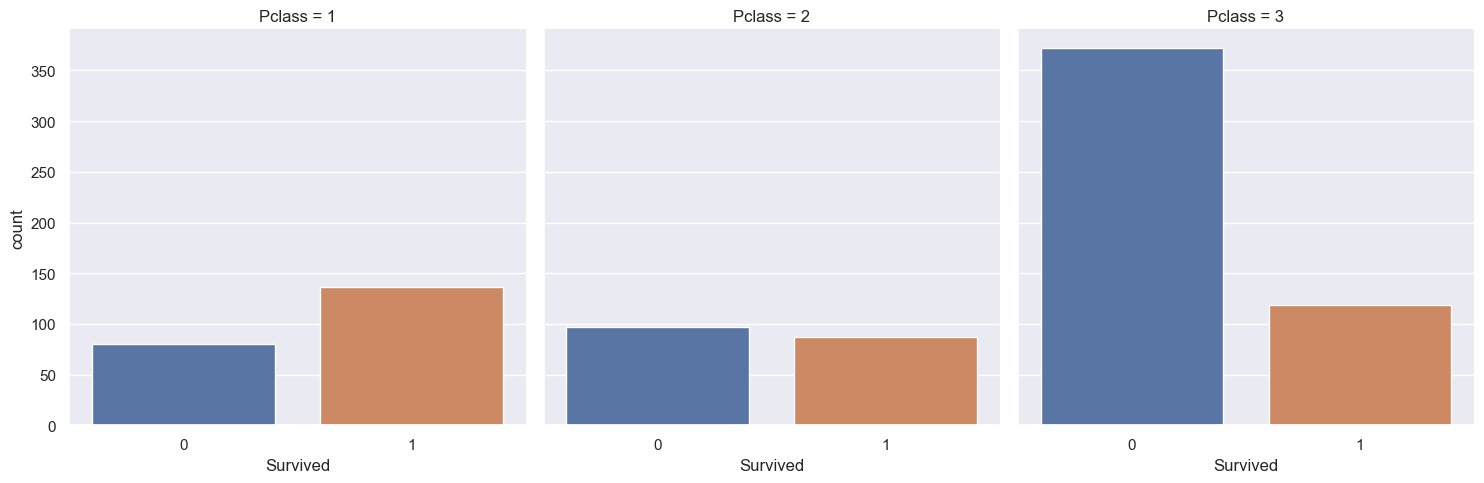

In [10]:
sns.catplot(x='Survived', col='Pclass', kind='count', data=df_train)

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


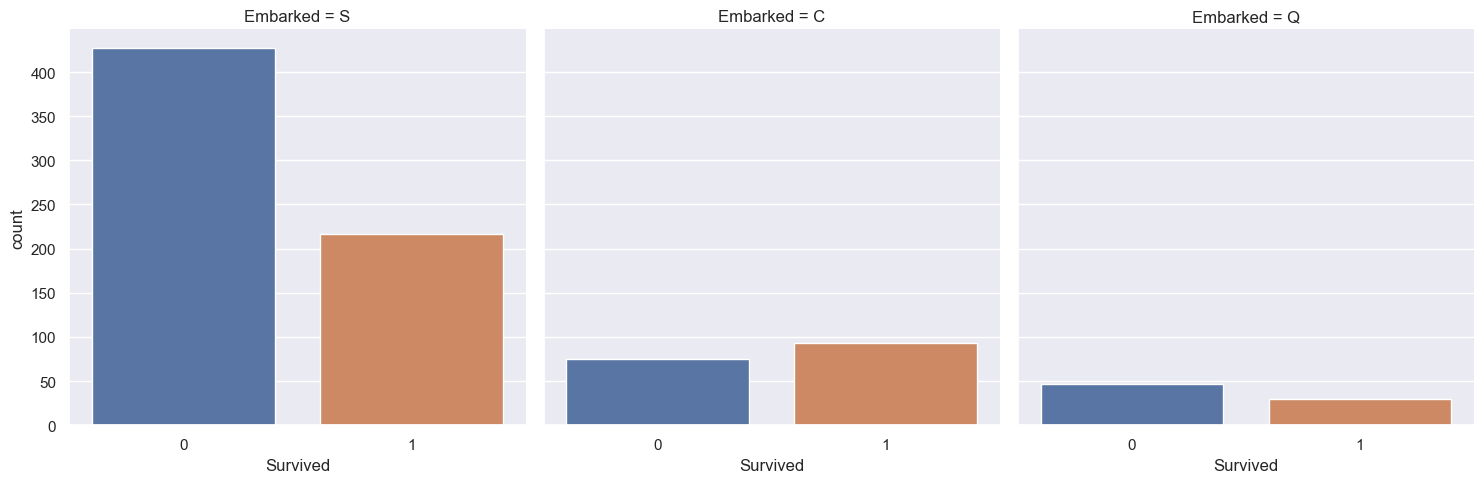

In [11]:
sns.catplot(x='Survived', col="Embarked", kind='count', data=df_train)

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


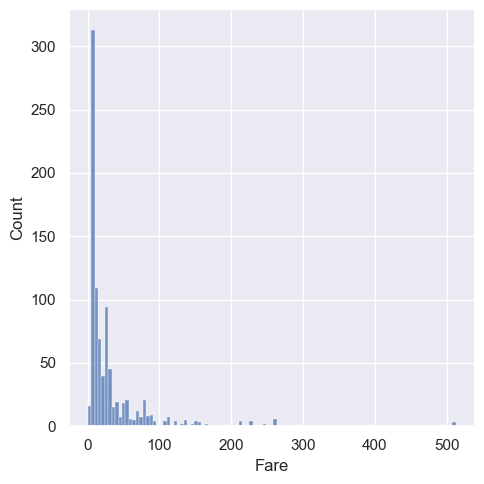

In [12]:
sns.displot(df_train.Fare, kde=False )

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


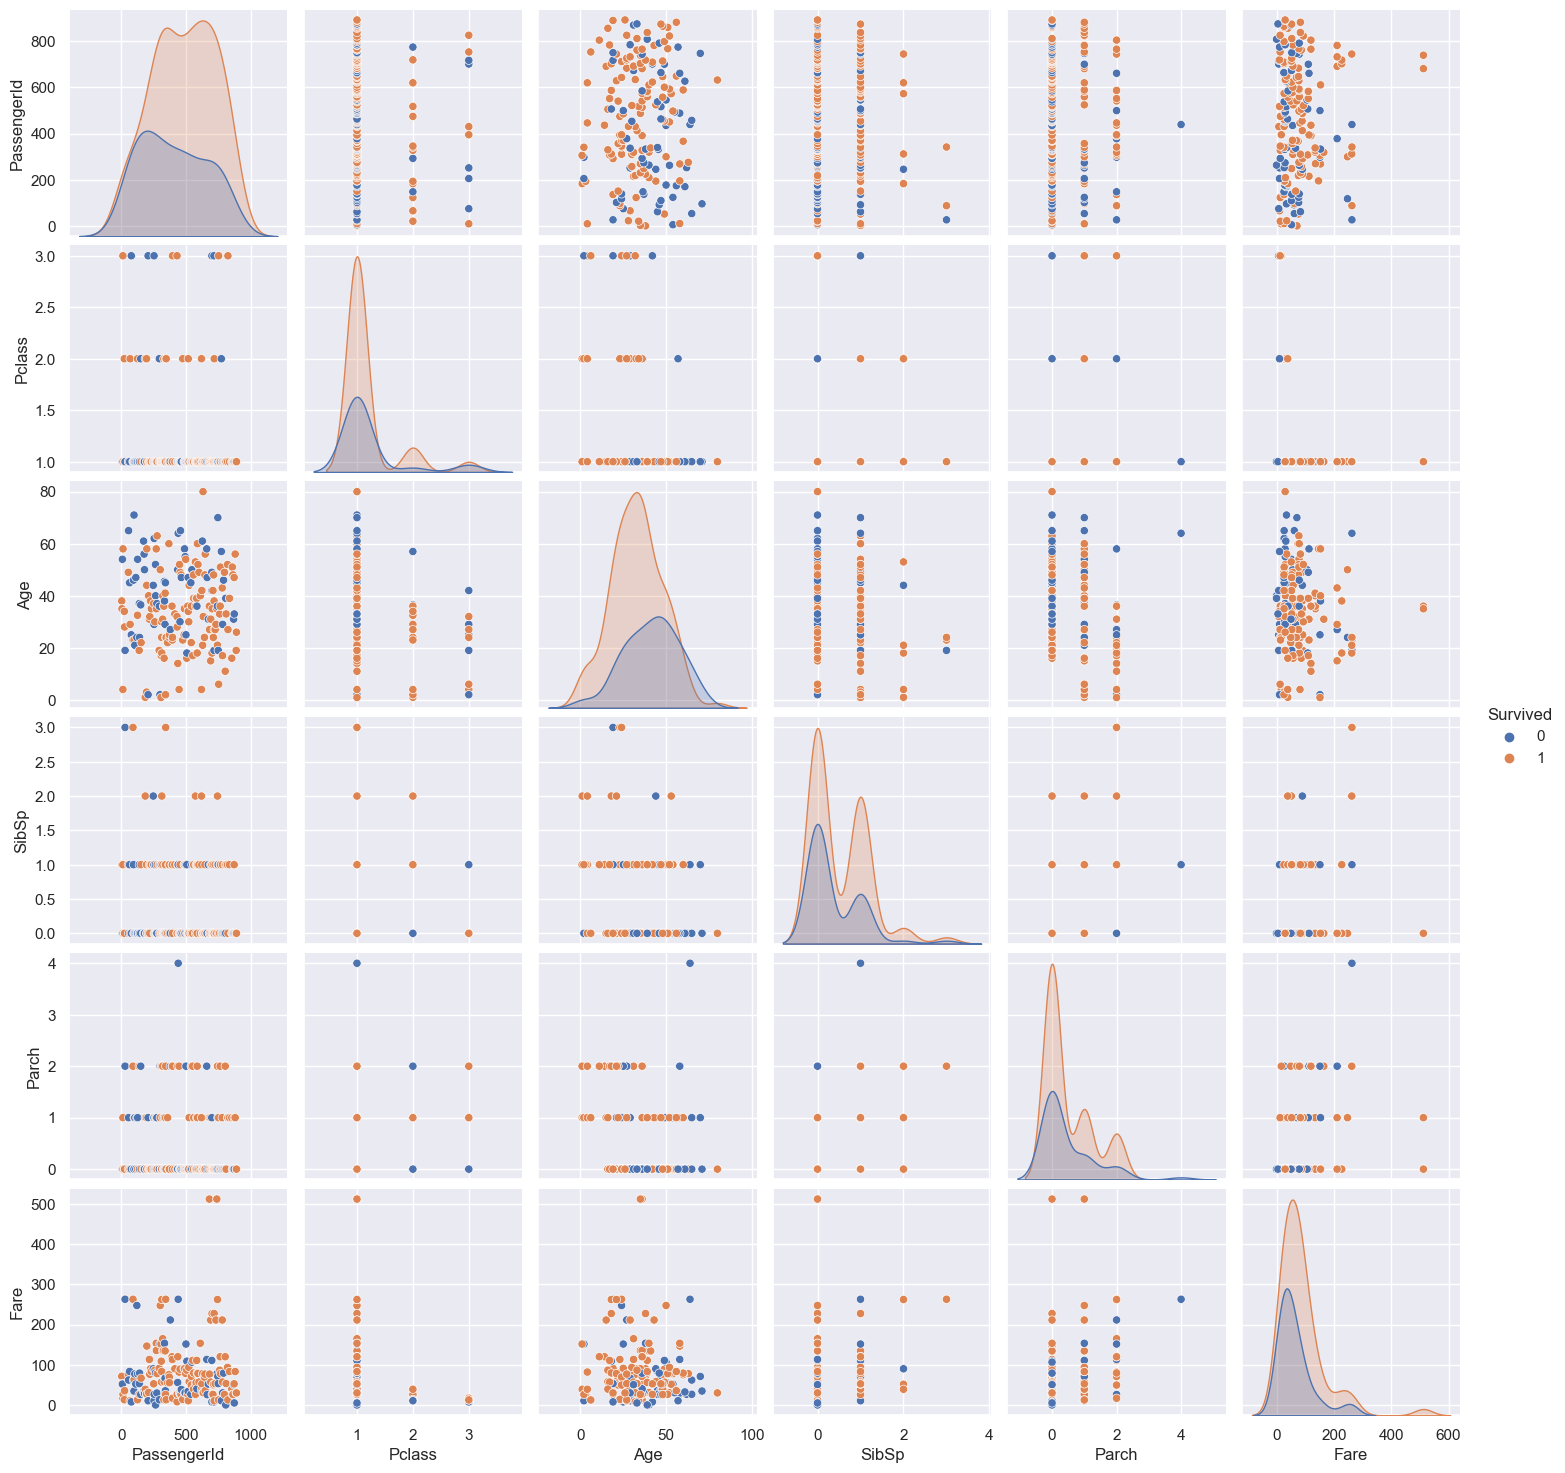

In [14]:
df_train_drop = df_train.dropna()
sns.pairplot(df_train_drop, hue='Survived')

# Data wrapping

In [15]:
Survived_train = df_train.Survived

data = pd.concat([df_train.drop(['Survived'], axis=1), df_test])

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [22]:
data['Age']=data.Age.fillna(data.Age.median())
data['Fare']=data.Fare.fillna(data.Fare.median())

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Age          1309 non-null   float64
 4   SibSp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Ticket       1309 non-null   object 
 7   Fare         1309 non-null   float64
 8   Cabin        295 non-null    object 
 9   Embarked     1307 non-null   object 
 10  Sex_female   1309 non-null   bool   
 11  Sex_male     1309 non-null   bool   
dtypes: bool(2), float64(2), int64(4), object(4)
memory usage: 115.0+ KB


In [24]:
data = data[['Sex_male', 'Fare', 'Age', 'Pclass', 'SibSp']]

data.head()

,Sex_male,Fare,Age,Pclass,SibSp
0,True,7.2500,22.0,3,1
1,False,71.2833,38.0,1,1
2,False,7.9250,26.0,3,0
3,False,53.1000,35.0,1,1
4,True,8.0500,35.0,3,0


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex_male  1309 non-null   bool   
 1   Fare      1309 non-null   float64
 2   Age       1309 non-null   float64
 3   Pclass    1309 non-null   int64  
 4   SibSp     1309 non-null   int64  
dtypes: bool(1), float64(2), int64(2)
memory usage: 52.4 KB


In [27]:
data_train = data.iloc[:891]
data_test = data.iloc[891:]

In [28]:
X = data_train.values
test = data_test.values
y= Survived_train.values

In [32]:
clf=tree.DecisionTreeClassifier()
clf.fit(X,y)

DecisionTreeClassifier()

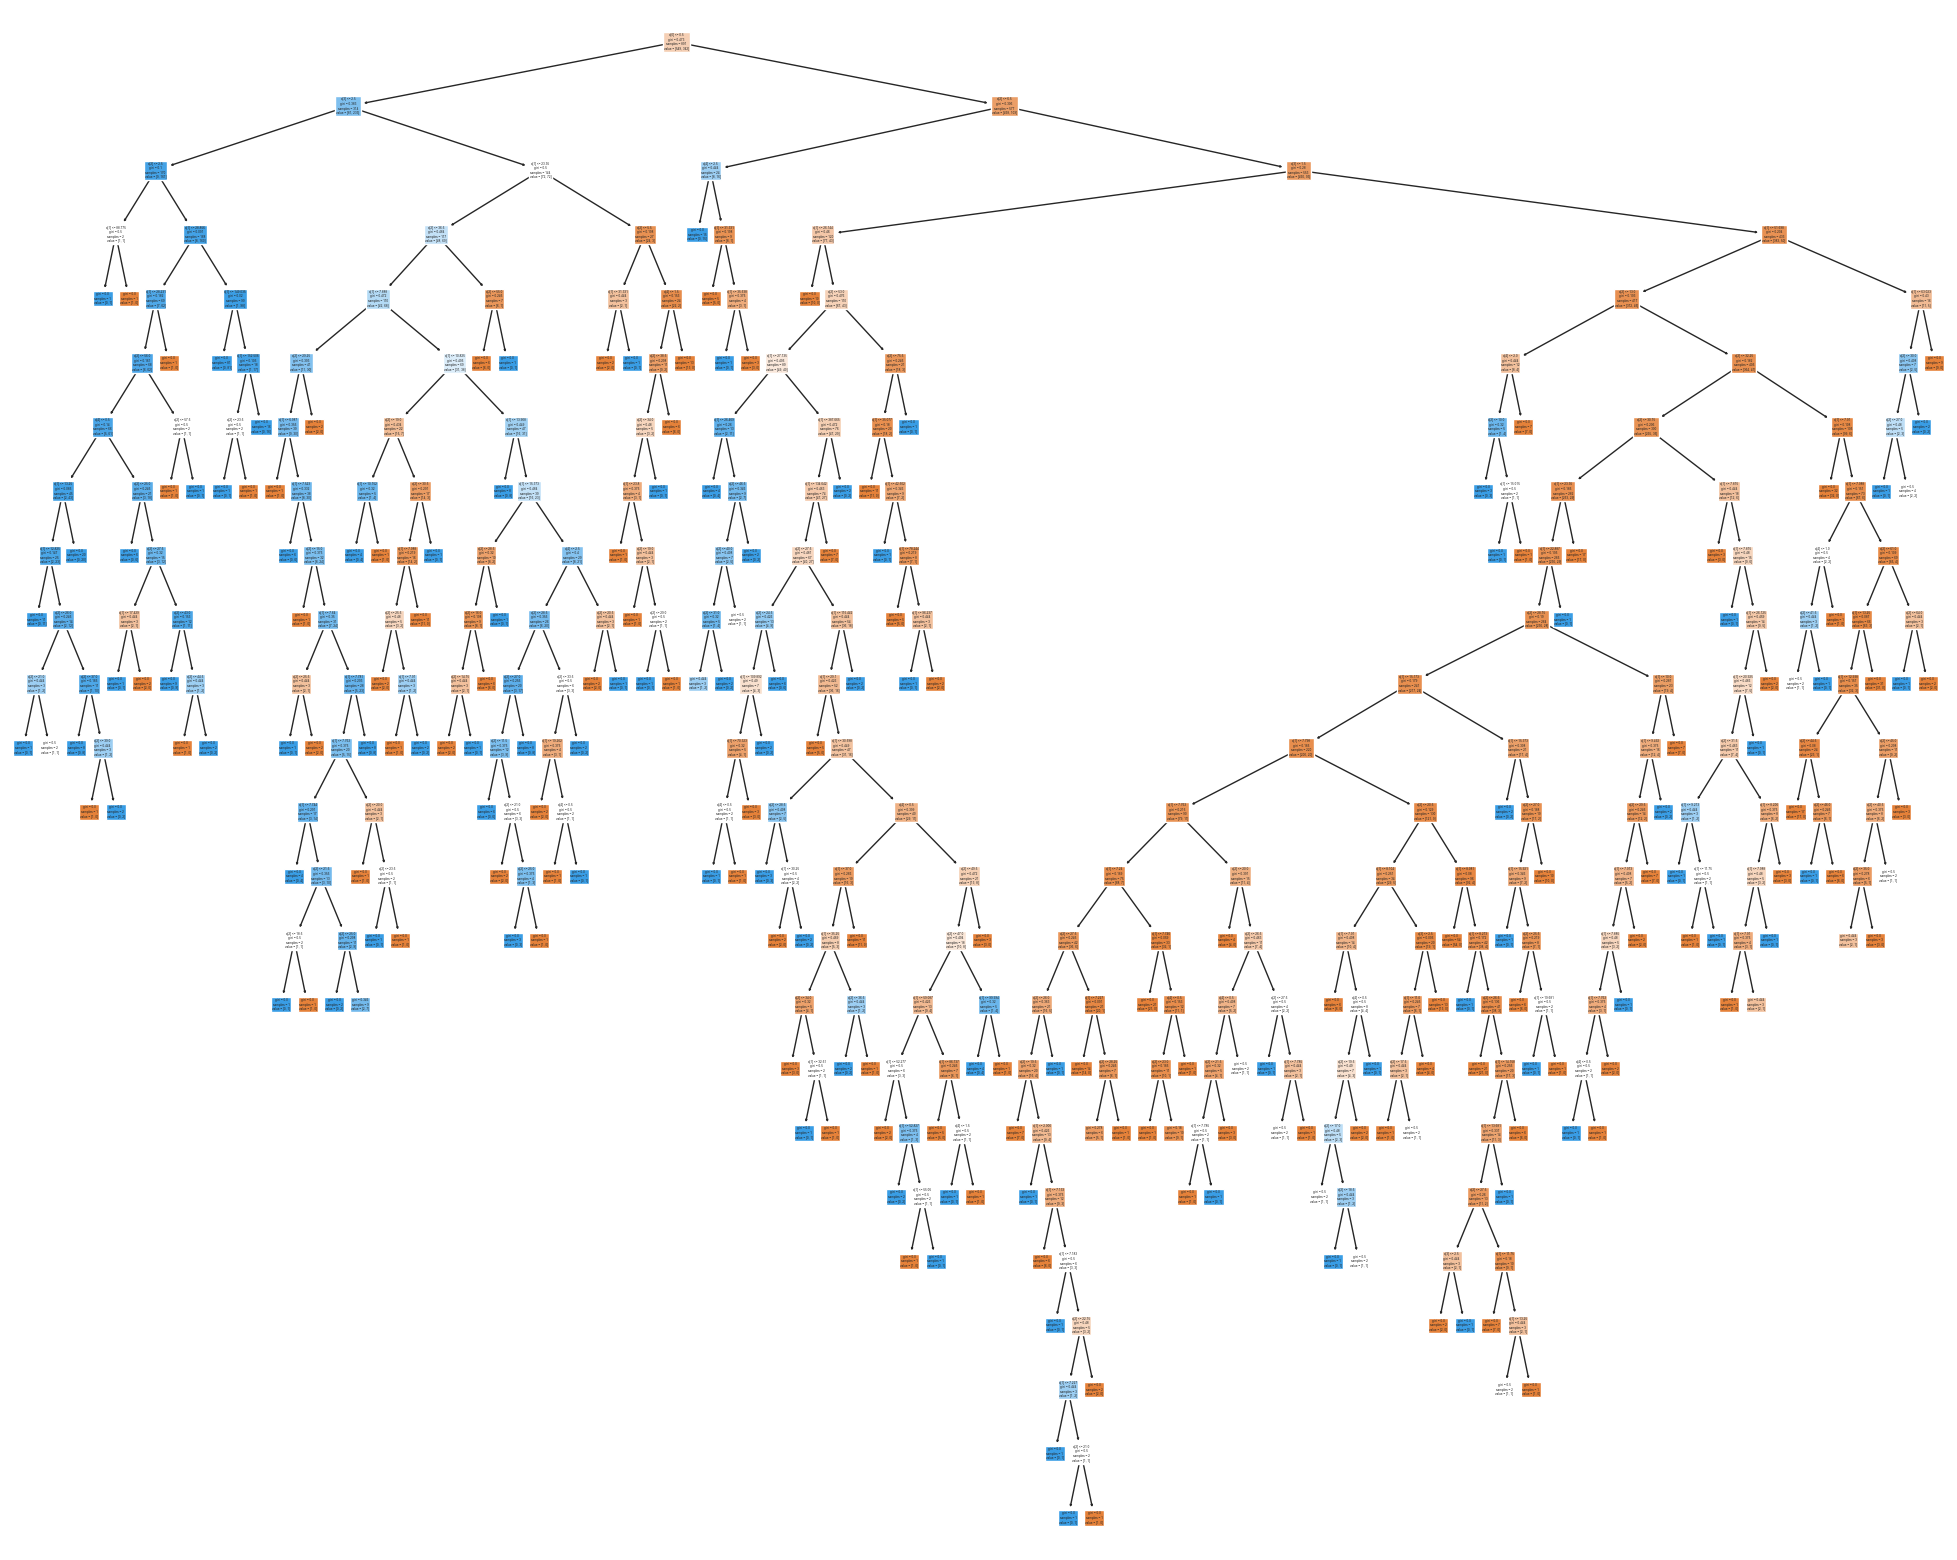

In [69]:


fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,   
                 
                   filled=True)

In [71]:
Y_pred = clf.predict(test)
df_test['Survived'] = Y_pred
clf.score(X, y)

0.978675645342312

In [85]:
df_test[['PassengerId', 'Survived','Name']].to_csv('Python Project/Survived.csv', index=False)